In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# One year from ESM1.5 historical to get temperature and pressure on model levels
d = xr.open_mfdataset('/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/atm/netCDF/HI-05.pa-1850*_mon.nc', combine='nested', concat_dim='time')

# ESM1.5 historical ozone from
# /g/data/vk83/experiments/inputs/access-esm1p5/modern/historical/atmosphere/forcing/global.N96/2021.06.22/ozone_1849_2015_ESM1.anc
# Also /scratch/public/mrd599/ozone_esm15.nc
ozone = xr.open_dataset('/scratch/p66/mrd599/ozone_esm15.nc').field60.squeeze()

In [3]:
ozone_diff = 1e6*(ozone[-12:].mean('time') - ozone[:].mean('time'))

# Convert theta to temperature (annual means)
ptheta = d['fld_s00i408'].mean('time')  # Pressure on theta levels
temp = d['fld_s00i004'].mean('time') * (ptheta / 1e5) **(2./7.)

/jobfs/130449043.gadi-pbs/ipykernel_653058/3688248570.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p = plt.pcolormesh(temp.lat_v, 1e-2*ptheta.mean('lon_u'), temp.mean('lon_u'))


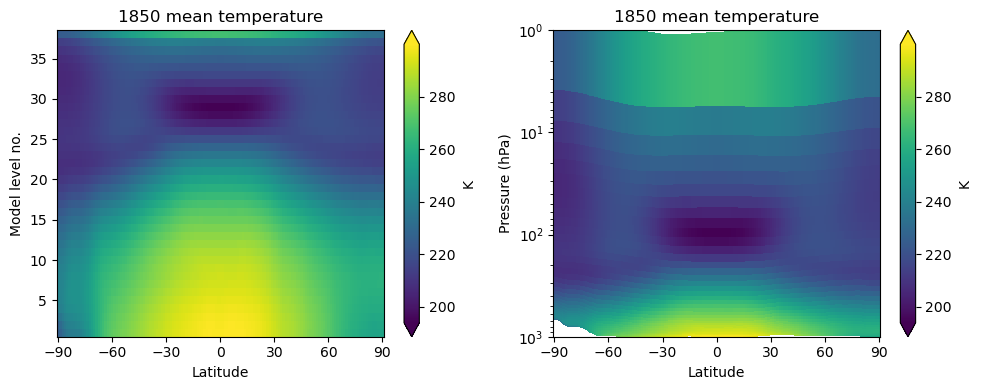

In [4]:
fig = plt.figure(figsize=(10,4))

axes = fig.add_subplot(1,2,1)
p = plt.pcolormesh(temp.lat_v, np.arange(1,39), temp.mean('lon_u'))
axes.set_xlabel('Latitude')
axes.set_xticks(np.linspace(-90,90,7))
axes.set_ylabel('Model level no.')
plt.colorbar(p, extend='both', label='K')
axes.set_title('1850 mean temperature')

axes = fig.add_subplot(1,2,2)
p = plt.pcolormesh(temp.lat_v, 1e-2*ptheta.mean('lon_u'), temp.mean('lon_u'))
plt.yscale('log')
axes.set_xlabel('Latitude')
axes.set_xticks(np.linspace(-90,90,7))
axes.set_ylabel('Pressure (hPa)')
plt.colorbar(p, extend='both', label='K')
axes.invert_yaxis()
axes.set_ylim(1e3,1)
axes.set_title('1850 mean temperature')

plt.tight_layout()

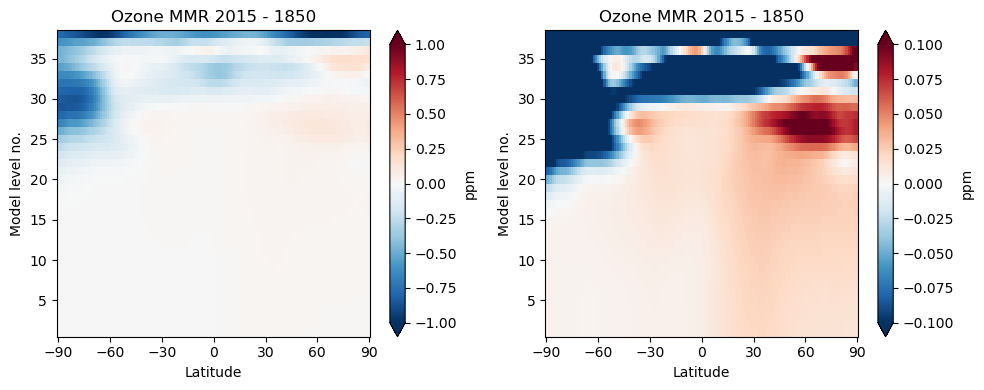

In [5]:
fig = plt.figure(figsize=(10,4))
axes = fig.add_subplot(1,2,1)
cbar_kwargs={'extend':'both', 'label':'ppm'}
ozone_diff.plot(vmax=1, cbar_kwargs=cbar_kwargs)
axes.set_xticks(np.linspace(-90,90,7))
axes.set_ylabel('Model level no.')
axes.set_xlabel('Latitude')
axes.set_title('Ozone MMR 2015 - 1850')
axes = fig.add_subplot(1,2,2)
ozone_diff.plot(vmax=0.1, cbar_kwargs=cbar_kwargs)
axes.set_xticks(np.linspace(-90,90,7))
axes.set_ylabel('Model level no.')
axes.set_xlabel('Latitude')
axes.set_title('Ozone MMR 2015 - 1850')
plt.tight_layout()

/jobfs/130449043.gadi-pbs/ipykernel_653058/3636463854.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p = plt.pcolormesh(temp.lat_v, 1e-2*ptheta.mean('lon_u'), ozone_diff, vmin=-1, vmax=1, cmap='RdBu_r')
/jobfs/130449043.gadi-pbs/ipykernel_653058/3636463854.py:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p = plt.pcolormesh(temp.lat_v, 1e-2*ptheta.mean('lon_u'), ozone_diff, vmin=-0.1, vmax=0.1, cmap='RdBu_r')


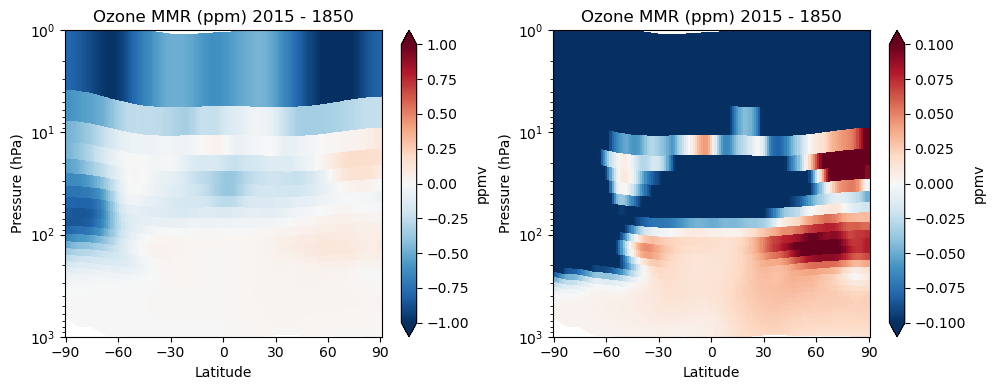

In [ ]:
fig = plt.figure(figsize=(10,4))

axes = fig.add_subplot(1,2,1)
p = plt.pcolormesh(temp.lat_v, 1e-2*ptheta.mean('lon_u'), ozone_diff, vmin=-1, vmax=1, cmap='RdBu_r')
axes.set_ylabel('Pressure (hPa)')
plt.yscale('log')
axes.set_xlabel('Latitude')
axes.set_title('Ozone MMR (ppm) 2015 - 1850')
axes.set_xticks(np.linspace(-90,90,7))
plt.colorbar(p, extend='both', label='ppmv')
axes.invert_yaxis()
axes.set_ylim(1e3,1)
plt.tight_layout()

axes = fig.add_subplot(1,2,2)
p = plt.pcolormesh(temp.lat_v, 1e-2*ptheta.mean('lon_u'), ozone_diff, vmin=-0.1, vmax=0.1, cmap='RdBu_r')
axes.set_ylabel('Pressure (hPa)')
plt.yscale('log')
axes.set_xlabel('Latitude')
axes.set_title('Ozone MMR (ppm) 2015 - 1850')
axes.set_xticks(np.linspace(-90,90,7))
plt.colorbar(p, extend='both', label='ppmv')
axes.invert_yaxis()
axes.set_ylim(1e3,1)
plt.tight_layout()